# Business Understanding

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data PreProcessing on Train

In [3]:
# Reading train data which we have already preprocessed
train = pd.read_csv('trainresult.csv')

In [4]:
train.head()

,Unnamed: 0,FlightNumber,Month,DayOfWeek,ScheduledTravelTime,Origin,Destination,Distance,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,Ori_DBT,Ori_DewPT,Ori_RelHumiP,Ori_WindSpeed,Ori_WindDir,Ori_WindGu,Ori_StaPre,Ori_Visib,Des_DBT,Des_DewPT,Des_RelHumP,Des_WindS,Des_WindDir,Des_WindGust,Des_Stapre,Des_Visib
0,0,BOS_CLE_29089,9,1,114,BOS,CLE,563,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.000000,69.0,41.0,36.0,8.0,280.0,0.0,30.20,10.0,70.0,53.0,55.0,7.0,10.0,0.0,29.46,10.0
1,1,BOS_CLE_42482,9,7,114,BOS,CLE,563,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.000000,70.0,57.0,64.0,10.0,130.0,0.0,30.09,10.0,78.0,58.0,50.0,5.0,360.0,0.0,29.30,10.0
2,2,BOS_CLE_42533,9,3,116,BOS,CLE,563,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.080000,67.0,64.0,91.0,9.0,50.0,0.0,30.16,10.0,66.0,63.0,90.0,20.0,50.0,25.0,29.02,6.0
3,3,BOS_CLE_27999,11,2,118,BOS,CLE,563,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,0.019605,44.0,39.0,83.0,8.0,190.0,0.0,30.13,10.0,51.0,47.0,86.0,5.0,10.0,0.0,29.10,2.5
4,4,MSP_CLE_30461,7,4,118,MSP,CLE,622,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.000000,76.0,62.0,62.0,8.0,80.0,0.0,29.13,10.0,69.0,58.0,68.0,4.0,160.0,0.0,29.23,10.0


In [5]:
train.columns

Index(['Unnamed: 0', 'FlightNumber', 'Month', 'DayOfWeek',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'Flight_Delay_Status', 'Origin_ws_id', 'Destination_ws_id',
       'Origin_GroH', 'Origin_StaH', 'Origin_BaroH', 'Des_GroH', 'Des_StaH',
       'Des_BaroH', 'Dep_avg', 'Origin_Hurpre', 'Arr_avg', 'Des_Hurpre',
       'Ori_DBT', 'Ori_DewPT', 'Ori_RelHumiP', 'Ori_WindSpeed', 'Ori_WindDir',
       'Ori_WindGu', 'Ori_StaPre', 'Ori_Visib', 'Des_DBT', 'Des_DewPT',
       'Des_RelHumP', 'Des_WindS', 'Des_WindDir', 'Des_WindGust', 'Des_Stapre',
       'Des_Visib'],
      dtype='object')

In [6]:
train=train.drop(['Unnamed: 0','DayOfWeek','Arr_avg','Dep_avg','Month'],axis=1)

In [7]:
train.shape

(7861, 32)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FlightNumber         7861 non-null   object 
 1   ScheduledTravelTime  7861 non-null   int64  
 2   Origin               7861 non-null   object 
 3   Destination          7861 non-null   object 
 4   Distance             7861 non-null   int64  
 5   Flight_Delay_Status  7861 non-null   int64  
 6   Origin_ws_id         7861 non-null   int64  
 7   Destination_ws_id    7861 non-null   int64  
 8   Origin_GroH          7861 non-null   int64  
 9   Origin_StaH          7861 non-null   int64  
 10  Origin_BaroH         7861 non-null   int64  
 11  Des_GroH             7861 non-null   int64  
 12  Des_StaH             7861 non-null   int64  
 13  Des_BaroH            7861 non-null   int64  
 14  Origin_Hurpre        7861 non-null   float64
 15  Des_Hurpre           7861 non-null   f

In [9]:
# type conversion to category
train['FlightNumber'] = train['FlightNumber'].astype('category')
train['Origin'] = train['Origin'].astype('category')
train['Destination'] = train['Destination'].astype('category')
train['Des_Visib'] = train['Des_Visib'].astype('category')
train['Ori_WindSpeed'] = train['Ori_WindSpeed'].astype('category')
train['Ori_Visib'] = train['Ori_Visib'].astype('category')
train['Des_WindS'] = train['Des_WindS'].astype('category')

In [10]:
train['Des_Stapre'] = train['Des_Stapre'].astype('int64')
train['Des_WindGust'] = train['Des_WindGust'].astype('int64')
train['Des_WindDir'] = train['Des_WindDir'].astype('int64')
train['Des_RelHumP'] = train['Des_RelHumP'].astype('int64')
train['Des_DBT'] = train['Des_DBT'].astype('int64')
train['Ori_StaPre'] = train['Ori_StaPre'].astype('int64')
train['Ori_WindGu'] = train['Ori_WindGu'].astype('int64')
train['Ori_WindDir'] = train['Ori_WindDir'].astype('int64')
train['Ori_RelHumiP'] = train['Ori_RelHumiP'].astype('int64')
train['Ori_DewPT'] = train['Ori_DewPT'].astype('int64')
train['Ori_DBT'] = train['Ori_DBT'].astype('int64')
train['Des_Hurpre'] = train['Des_Hurpre'].astype('int64')
train['Origin_Hurpre'] = train['Origin_Hurpre'].astype('int64')
train['Des_DewPT'] = train['Des_DewPT'].astype('int64')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['FlightNumber']= le.fit_transform(train['FlightNumber'])  

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Origin']= le.fit_transform(train['Origin'])  

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Destination']= le.fit_transform(train['Destination'])  

In [14]:
x_train=train.drop('Flight_Delay_Status',axis=1)   # Dropping Target Column
y_train=train['Flight_Delay_Status']        #Target Column 
x_train.shape

(7861, 31)

# Feature selection Train

In [15]:
# creating Function for checking correlated variables

def correlation(x_train,threshold):
  col_corr=set()
  corr_matrix=x_train.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j] )>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname) 
  return col_corr 

In [16]:
# Fixing thrshold value percentage as 0.9:

corr_features=correlation(x_train,0.9)
len(set(corr_features))
print('correlated features:',len(set(corr_features)))

correlated features: 8


In [17]:
print('correlated features are:' , corr_features)   # finding Correlated features

correlated features are: {'Origin', 'Origin_StaH', 'Ori_StaPre', 'Des_StaH', 'Des_Stapre', 'Origin_BaroH', 'Des_BaroH', 'Distance'}


In [18]:
x_train_noncorr=x_train.drop(corr_features,axis=1)  # Dropping Correlated features in train data


In [19]:
x_train_noncorr.columns

Index(['FlightNumber', 'ScheduledTravelTime', 'Destination', 'Origin_ws_id',
       'Destination_ws_id', 'Origin_GroH', 'Des_GroH', 'Origin_Hurpre',
       'Des_Hurpre', 'Ori_DBT', 'Ori_DewPT', 'Ori_RelHumiP', 'Ori_WindSpeed',
       'Ori_WindDir', 'Ori_WindGu', 'Ori_Visib', 'Des_DBT', 'Des_DewPT',
       'Des_RelHumP', 'Des_WindS', 'Des_WindDir', 'Des_WindGust', 'Des_Visib'],
      dtype='object')

In [20]:
# Feature Scaling---Min-Max

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train=pd.DataFrame(min_max.fit_transform(x_train_noncorr))

# Data PreProcessing on Test

In [21]:
# Reading test data
test = pd.read_csv('testresult.csv')

In [22]:
test.head()

,Unnamed: 0,FlightNumber,UTC_Deptime,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,Ori_SkyCon,Ori_DBT,Ori_DewPT,Ori_RelHumiP,Ori_WindSpeed,Ori_WindDir,Ori_WindGu,Ori_StaPre,Ori_Visib,Des_SkyCon,Des_DBT,Des_DewPT,Des_RelHumP,Des_WindS,Des_WindDir,Des_WindGust,Des_Stapre,Des_Visib,y
0,0,DEN_XNA_62349,2005-09-12 22:16:00,1,2005-09-12 23:56:00,100,DEN,XNA,616,3017,3017,5379,5431,5382,5379,5431,5382,2005-09-12 22:00:00,0.0,2005-09-12 23:00:00,0.0,FEW100 SCT140,55.0,34.0,45.0,9.0,120,0.0,24.63,10.0,SCT110,54.0,32.0,43.0,5.0,120,0.0,24.64,10.0,2005-09-12 22:00:00
1,1,DEN_SAT_82515,2005-09-06 15:55:00,2,2005-09-06 17:57:00,122,DEN,SAT,794,3017,3017,5379,5431,5382,5379,5431,5382,2005-09-06 15:00:00,0.0,2005-09-06 17:00:00,0.0,FEW070 SCT120 SCT150,77.0,48.0,36.0,4.0,0,0.0,24.84,10.0,FEW070 SCT120 BKN150,73.0,48.0,41.0,10.0,140,0.0,24.86,10.0,2005-09-06 16:00:00
2,2,DEN_ICT_94174,2005-07-23 22:56:00,6,2005-07-24 00:17:00,81,DEN,ICT,419,3017,3017,5379,5431,5382,5379,5431,5382,2005-07-23 22:00:00,0.0,2005-07-24 00:00:00,0.0,FEW070 SCT110 BKN150,71.0,54.0,55.0,10.0,300,0.0,24.73,10.0,SCT130 BKN180,67.0,54.0,63.0,3.0,150,0.0,24.73,10.0,2005-07-23 23:00:00
3,3,DEN_SAT_78504,2005-09-04 19:30:00,7,2005-09-04 21:29:00,119,DEN,SAT,794,3017,3017,5379,5431,5382,5379,5431,5382,2005-09-04 19:00:00,0.0,2005-09-04 21:00:00,0.0,FEW080 BKN140,75.0,43.0,32.0,8.0,360,0.0,24.71,10.0,FEW080 BKN120,75.0,43.0,32.0,7.0,280,0.0,24.73,10.0,2005-09-04 20:00:00
4,4,DEN_PHL_82820,2005-03-23 21:05:00,3,2005-03-24 00:25:00,200,DEN,PHL,1557,3017,3017,5379,5431,5382,5379,5431,5382,2005-03-23 21:00:00,0.0,2005-03-24 00:00:00,0.0,BKN009 OVC100,36.0,34.0,93.0,4.0,200,0.0,24.30,7.0,BKN085,33.0,31.0,92.0,0.0,0,0.0,24.31,4.0,2005-03-23 21:00:00


In [23]:
test.columns

Index(['Unnamed: 0', 'FlightNumber', 'UTC_Deptime', 'DayOfWeek', 'UTC_Arrtime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'Origin_ws_id', 'Destination_ws_id', 'Origin_GroH', 'Origin_StaH',
       'Origin_BaroH', 'Des_GroH', 'Des_StaH', 'Des_BaroH', 'Dep_avg',
       'Origin_Hurpre', 'Arr_avg', 'Des_Hurpre', 'Ori_SkyCon', 'Ori_DBT',
       'Ori_DewPT', 'Ori_RelHumiP', 'Ori_WindSpeed', 'Ori_WindDir',
       'Ori_WindGu', 'Ori_StaPre', 'Ori_Visib', 'Des_SkyCon', 'Des_DBT',
       'Des_DewPT', 'Des_RelHumP', 'Des_WindS', 'Des_WindDir', 'Des_WindGust',
       'Des_Stapre', 'Des_Visib', 'y'],
      dtype='object')

In [24]:
test=test.drop(['Unnamed: 0','y','UTC_Deptime','UTC_Arrtime','Arr_avg','Dep_avg','Ori_SkyCon','Des_SkyCon'],axis=1)

In [25]:
test.columns

Index(['FlightNumber', 'DayOfWeek', 'ScheduledTravelTime', 'Origin',
       'Destination', 'Distance', 'Origin_ws_id', 'Destination_ws_id',
       'Origin_GroH', 'Origin_StaH', 'Origin_BaroH', 'Des_GroH', 'Des_StaH',
       'Des_BaroH', 'Origin_Hurpre', 'Des_Hurpre', 'Ori_DBT', 'Ori_DewPT',
       'Ori_RelHumiP', 'Ori_WindSpeed', 'Ori_WindDir', 'Ori_WindGu',
       'Ori_StaPre', 'Ori_Visib', 'Des_DBT', 'Des_DewPT', 'Des_RelHumP',
       'Des_WindS', 'Des_WindDir', 'Des_WindGust', 'Des_Stapre', 'Des_Visib'],
      dtype='object')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FlightNumber         6566 non-null   object 
 1   DayOfWeek            6566 non-null   int64  
 2   ScheduledTravelTime  6566 non-null   int64  
 3   Origin               6566 non-null   object 
 4   Destination          6566 non-null   object 
 5   Distance             6566 non-null   int64  
 6   Origin_ws_id         6566 non-null   int64  
 7   Destination_ws_id    6566 non-null   int64  
 8   Origin_GroH          6566 non-null   int64  
 9   Origin_StaH          6566 non-null   int64  
 10  Origin_BaroH         6566 non-null   int64  
 11  Des_GroH             6566 non-null   int64  
 12  Des_StaH             6566 non-null   int64  
 13  Des_BaroH            6566 non-null   int64  
 14  Origin_Hurpre        6566 non-null   float64
 15  Des_Hurpre           6566 non-null   f

In [27]:
# type conversion to category
test['FlightNumber'] = test['FlightNumber'].astype('category')
test['Origin'] = test['Origin'].astype('category')
test['Destination'] = test['Destination'].astype('category')

In [28]:
test['Des_Stapre'] = test['Des_Stapre'].astype('int64')
test['Des_WindGust'] = test['Des_WindGust'].astype('int64')
test['Des_RelHumP'] = test['Des_RelHumP'].astype('int64')
test['Des_DewPT'] = test['Des_DewPT'].astype('int64')
test['Des_DBT'] = test['Des_DBT'].astype('int64')
test['Ori_StaPre'] = test['Ori_StaPre'].astype('int64')
test['Ori_WindGu'] = test['Ori_WindGu'].astype('int64')
test['Ori_RelHumiP'] = test['Ori_RelHumiP'].astype('int64')
test['Ori_DewPT'] = test['Ori_DewPT'].astype('int64')
test['Ori_DBT'] = test['Ori_DBT'].astype('int64')
test['Des_Hurpre'] = test['Des_Hurpre'].astype('int64')
test['Origin_Hurpre'] = test['Origin_Hurpre'].astype('int64')
test['Ori_Visib'] = test['Ori_Visib'].astype('int64')
test['Des_WindS'] = test['Des_WindS'].astype('int64')
test['Des_Visib'] = test['Des_Visib'].astype('int64')
test['Ori_WindSpeed'] = test['Ori_WindSpeed'].astype('int64')


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   FlightNumber         6566 non-null   category
 1   DayOfWeek            6566 non-null   int64   
 2   ScheduledTravelTime  6566 non-null   int64   
 3   Origin               6566 non-null   category
 4   Destination          6566 non-null   category
 5   Distance             6566 non-null   int64   
 6   Origin_ws_id         6566 non-null   int64   
 7   Destination_ws_id    6566 non-null   int64   
 8   Origin_GroH          6566 non-null   int64   
 9   Origin_StaH          6566 non-null   int64   
 10  Origin_BaroH         6566 non-null   int64   
 11  Des_GroH             6566 non-null   int64   
 12  Des_StaH             6566 non-null   int64   
 13  Des_BaroH            6566 non-null   int64   
 14  Origin_Hurpre        6566 non-null   int64   
 15  Des_Hurpre           

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['FlightNumber']= le.fit_transform(test['FlightNumber'])

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Origin']= le.fit_transform(test['Origin'])

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Destination']= le.fit_transform(test['Destination'])

In [33]:
test.shape

(6566, 32)

In [34]:
flightno=test['FlightNumber']
test.drop(['FlightNumber'],axis=1,inplace=True)

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
test_scaled=pd.DataFrame(min_max.fit_transform(test))

In [36]:
test_scaled.shape

(6566, 31)

In [37]:
print(train.shape)
print(test.shape)

(7861, 32)
(6566, 31)


# Feature selection Test

In [38]:
test_noncorr=test.drop(corr_features,axis=1) 

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
test=pd.DataFrame(min_max.fit_transform(test_noncorr))

In [40]:
print(x_train.shape)
print(test.shape)

(7861, 23)
(6566, 23)


# Modle Building

In [41]:
from sklearn.linear_model import LogisticRegression
logis=LogisticRegression()
logis.fit(x_train,y_train)

LogisticRegression()

In [42]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)

In [43]:
# Defining parameter for hyperParameter Tuning

from sklearn.model_selection import GridSearchCV  # importing GridSearchCV for Tuning

n_estimators=[100]

min_samples_split=[2,4,6]

min_samples_leaf=[1,2,4,6]

param_grid={'n_estimators': n_estimators,
            'min_samples_split':min_samples_split,
             'min_samples_split': min_samples_split,
             'criterion':['gini']}
print(param_grid)

{'n_estimators': [100], 'min_samples_split': [2, 4, 6], 'criterion': ['gini']}


In [44]:
#importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_gridcv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=kf,verbose=2)  

rf_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, mi

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100]},
             verbose=2)

In [45]:
rf_gridcv.best_params_   # finding best Parameters

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 100}

In [46]:
rf_gridcv.best_estimator_

RandomForestClassifier()

In [47]:
best_grid=rf_gridcv.best_estimator_

In [48]:
# Predicting the values on Test data

y_pred=best_grid.predict(test)

In [49]:
result=pd.DataFrame({'FlightNumber':flightno,'Flight_Delay_Status':y_pred})

In [50]:
result.to_csv('Final_prediction.csv')

In [60]:
from sklearn.metrics import accuracy_score,classification_report

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.33      0.67      0.44       209
           2       0.95      0.84      0.89      1757

    accuracy                           0.82      1966
   macro avg       0.64      0.75      0.67      1966
weighted avg       0.89      0.82      0.85      1966



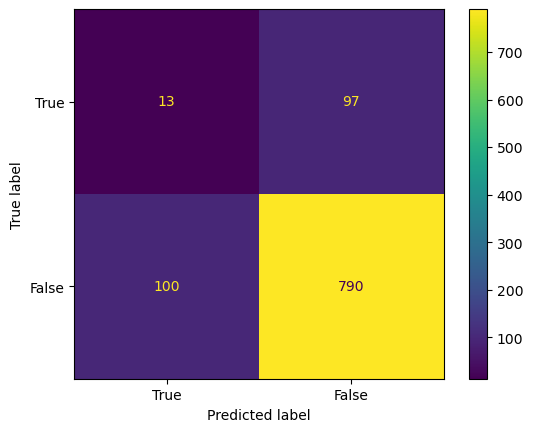

In [62]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
                                                                                                  

cm_display.plot()
plt.show()

# Imputed to Find Best model 

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Rf',RandomForestClassifier()))

results=[]
names=[]


for name,model in models:
  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  predictions=[round(value) for value in y_pred]

  accuracy=accuracy_score(y_test,predictions)
  print('Accuracy: %2f%%' %(accuracy*100),name)
 
  

Accuracy: 79.755849% KNN
Accuracy: 80.213632% LogisticRegression
Accuracy: 82.146490% Rf
